In [1]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pydub.utils import mediainfo
import os
from pymediainfo import MediaInfo
import subprocess
from multiprocessing import Pool, cpu_count
# Get the current working directory and navigate to the project root
project_root_path = Path.cwd().parent.parent  # Adjust the number of .parent calls as needed
if str(project_root_path) not in sys.path:
    sys.path.append(str(project_root_path))

from project_root import get_path

d:\Github\Harmony\.venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# Get the path to the CSV file
csv_file_path = get_path('data', 'cleaned.csv')
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
tsv_file_path = get_path('data', 'uncleaned_data.tsv')
# Read the TSV file into a DataFrame
df_uncleaned = pd.read_csv(tsv_file_path, sep='\t')

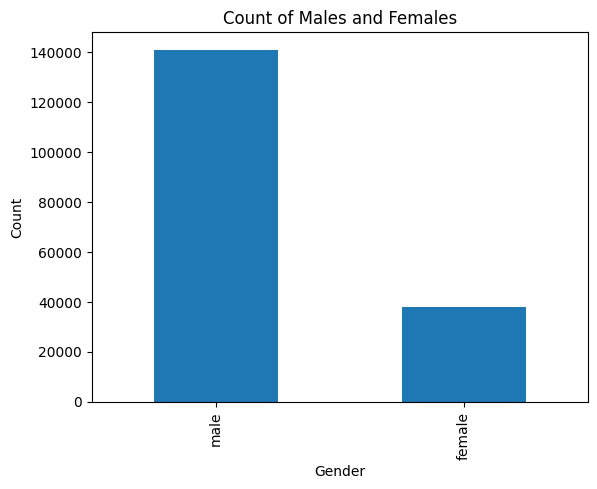

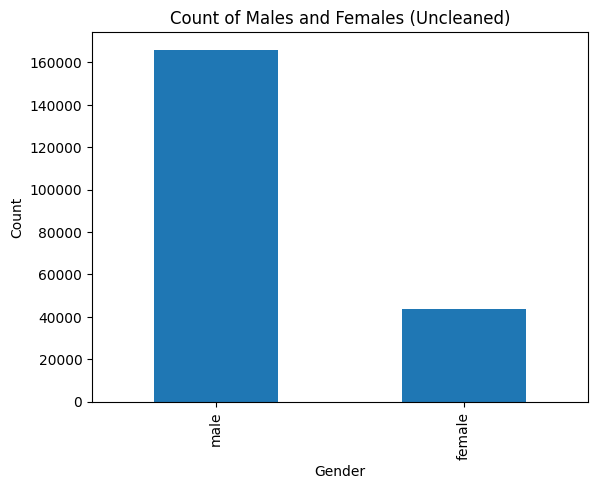

In [3]:

#plot many males to females are there
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()
# Import matplotlib for plotting
# Plot the counts of males and females
gender_counts.plot(kind='bar', title='Count of Males and Females', xlabel='Gender', ylabel='Count')
plt.show()
# Count the occurrences of each gender in the uncleaned data
gender_counts_uncleaned = df_uncleaned['gender'].value_counts()
# Plot the counts of males and females in the uncleaned data
gender_counts_uncleaned.plot(kind='bar', title='Count of Males and Females (Uncleaned)', xlabel='Gender', ylabel='Count')
plt.show()

In [ ]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count

# ===== 1. CONFIGURE PATHS =====
AUDIO_DIR = r"D:\Github\NN Dataset zips"
CSV_PATH = "D:\Github\Harmony\data\cleaned.csv"  # Your original CSV file

# ===== 2. INITIALIZE/RESUME =====
try:
    # Try loading existing progress
    df = pd.read_csv(CSV_PATH)
    if 'audio_length' not in df.columns:
        df['audio_length'] = None  # Initialize column if missing
    remaining_count = len(df[df['audio_length'].isna()])
    print(f"Resuming processing - {remaining_count} files remaining")
except FileNotFoundError:
    raise Exception("Original CSV file not found!")

# ===== 3. AUDIO LENGTH EXTRACTION =====
def get_audio_length(file_path):
    try:
        cmd = [
            'ffprobe',
            '-v', 'error',
            '-show_entries', 'format=duration',
            '-of', 'default=noprint_wrappers=1:nokey=1',
            file_path
        ]
        output = subprocess.check_output(cmd, stderr=subprocess.PIPE, timeout=5)
        return float(output.decode('utf-8').strip())
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return 0.0

def process_file(file_name):
    file_path = os.path.join(AUDIO_DIR, file_name)
    return get_audio_length(file_path)

# ===== 4. PROCESSING IN CHUNKS =====
if __name__ == "__main__":
    # Process in chunks and save after each
    chunk_size = 1000  # Adjust based on your system
    remaining = df[df['audio_length'].isna()]
    
    for i in range(0, len(remaining), chunk_size):
        chunk = remaining.iloc[i:i + chunk_size]
        print(f"Processing files {i} to {i + len(chunk)}...")
        
        with Pool(cpu_count()) as pool:
            chunk_results = pool.map(process_file, chunk['path'])
        
        # Update original DataFrame
        df.loc[chunk.index, 'audio_length'] = chunk_results
        
        # Save progress back to original CSV
        df.to_csv(CSV_PATH, index=False)
        print(f"Saved progress up to file {i + len(chunk)}")

    print("Processing complete!")
    
    # Optional analysis
    df['audio_length'].hist(bins=50, edgecolor='black')
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Frequency")
    plt.title("Audio Length Distribution")
    plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:9: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Karim\AppData\Local\Temp\ipykernel_14972\2113209688.py:9: SyntaxWarning: invalid escape sequence '\G'
  CSV_PATH = "D:\Github\Harmony\data\cleaned.csv"  # Your original CSV file


Resuming processing - 178869 files remaining
Processing files 0 to 1000...
